In [1]:
import numpy as np
from tqdm.notebook import tqdm
import holoviews as hv
hv.extension('matplotlib')

import NES
from eikonalfm import factored_fast_marching as ffm
from eikonalfm import distance

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

# Grid definition

In [2]:
# Receiver points

nx, nz = 51, 51

xmin, xmax = -1.0, 1.0
zmin, zmax = -1.0, 1.0
x = np.linspace(xmin, xmax, nx)
z = np.linspace(zmin, zmax, nz)

Xr = np.stack(np.meshgrid(x, z, indexing='ij'), axis=-1)

# Source points
s_sp = 5
Xs = np.stack(np.meshgrid(x[::s_sp], z[::s_sp], indexing='ij'), axis=-1)

X = np.stack(np.meshgrid(x[::s_sp], z[::s_sp], x, z, indexing='ij'), axis=-1)

In [3]:
Vel = NES.misc.LocAnomaly(2.0, 1.0, 
                          [0.0, 0.0], 
                          [0.25, 0.25])

V = Vel(Xr)

In [4]:
# 2-order Factored FMM

T = np.empty(Xs.shape[:-1] + Xr.shape[:-1])
dxs = [x[1]-x[0], z[1]-z[0]]
for i, ixs in enumerate(tqdm(range(0, nx, s_sp))):
    for j, jzs in enumerate(range(0, nz, s_sp)):
        T[i,j] = ffm(V, (ixs,jzs), dxs, 2)
        T[i,j] *= distance(V.shape, dxs, (ixs,jzs), indexing='ij')

:Overlay
   .Image.Velocity :Image   [x,y]   (z)
   .Contours.FMM   :Contours   [x,y]   (z)
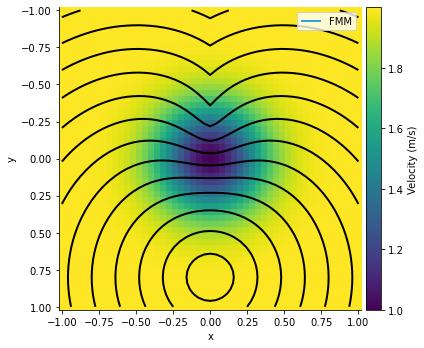

In [5]:
i, j = 5, 9

vmap = hv.Image((x, z, V.T), label='Velocity').opts(cmap='viridis', 
                                                    colorbar=True,
                                                    clabel='Velocity (m/s)')

tmap = hv.Image((x, z, T[i,j].T), label='FMM')
tctr = hv.operation.contours(tmap, levels=15).opts(cmap='kb', show_legend=True, linestyle='solid', 
                                                   linewidth=2, color_levels=1)

(vmap * tctr).opts(hv.opts.Image(show_legend=False, fig_size=150, invert_yaxis=True))

In [144]:
hv.save(vmap, 'model.png', dpi=300)

### How to define an activation function?
**Example:** `act = 'ad-tanh-10'`

It must contain 3 parts separated by dash '-':

1.   first part can be either `''` (empty - non-adaptive), `'ad'` or `'lad'` (meaning locally adaptive)
2.   second part is the name of activation function (`'tanh', 'sigmoid', 'relu'`, ...)
3.   third part is the adaptive degree `n` (e.g. `tanh(n * x)`)


In [6]:
equation = NES.IsoEikonal(p=3, hamiltonian=True)
Eik = NES.NES_TP(velocity=Vel, eikonal=equation)

In [7]:
Eik.build_model(nl=5, nu=75, 
                act='ad-gauss-1', # hidden activation
                out_act='ad-sigmoid-1', # output activation
                reciprocity=True, # T(xs, xr) = T(xr, xs)
                factored=True, # factorization - T = T0 * S, where T0 homogeneous solution
                out_vscale=True, # improved factorization T = T0 * S, where S in [1/vmax, 1/vmin] 
                input_scale=True,)

In [8]:
Eik.compile(lr=5e-3, loss='mae', decay=1e-4)

In [9]:
limits = np.array([[xmin, zmin]*2, [xmax, zmax]*2]).T
pdf = NES.Uniform_PDF(limits)
x_train = pdf(50000)

In [18]:
%%time
h = Eik.train(x_train=x_train,
#               tolerance=1e-2,
              batch_size=10000, 
              epochs=40, 
              verbose=2)

Epoch 1/40
5/5 - 2s - loss: 0.0279
Epoch 2/40
5/5 - 2s - loss: 0.0284
Epoch 3/40
5/5 - 2s - loss: 0.0269
Epoch 4/40
5/5 - 2s - loss: 0.0241
Epoch 5/40
5/5 - 2s - loss: 0.0217
Epoch 6/40
5/5 - 2s - loss: 0.0199
Epoch 7/40
5/5 - 2s - loss: 0.0198
Epoch 8/40
5/5 - 2s - loss: 0.0195
Epoch 9/40
5/5 - 2s - loss: 0.0186
Epoch 10/40
5/5 - 2s - loss: 0.0179
Epoch 11/40
5/5 - 2s - loss: 0.0184
Epoch 12/40
5/5 - 2s - loss: 0.0174
Epoch 13/40
5/5 - 2s - loss: 0.0174
Epoch 14/40
5/5 - 2s - loss: 0.0161
Epoch 15/40
5/5 - 2s - loss: 0.0152
Epoch 16/40
5/5 - 2s - loss: 0.0153
Epoch 17/40
5/5 - 2s - loss: 0.0161
Epoch 18/40
5/5 - 2s - loss: 0.0163
Epoch 19/40
5/5 - 2s - loss: 0.0165
Epoch 20/40
5/5 - 2s - loss: 0.0164
Epoch 21/40
5/5 - 2s - loss: 0.0159
Epoch 22/40
5/5 - 2s - loss: 0.0160
Epoch 23/40
5/5 - 2s - loss: 0.0157
Epoch 24/40
5/5 - 2s - loss: 0.0150
Epoch 25/40
5/5 - 2s - loss: 0.0146
Epoch 26/40
5/5 - 2s - loss: 0.0139
Epoch 27/40
5/5 - 2s - loss: 0.0135
Epoch 28/40
5/5 - 2s - loss: 0.0142
E

In [19]:
filepath = 'Models/ModelTP'
Eik.save(filepath, save_optimizer=True, training_data=False)

:Curve   [x]   (y)
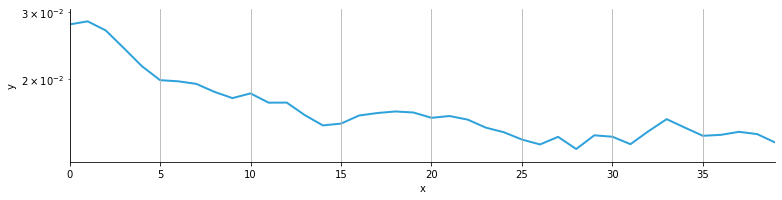

In [20]:
 hv.Curve(h.history['loss']).opts(logy=True, show_grid=True, fig_size=350, aspect=2)

## Loading

In [6]:
filepath = 'Models/ModelLocAnomaly'
EikTP = NES.NES_TP.load(filepath)

Loaded model from "Models/ModelLocAnomaly"
Compiled the model with saved optimizer


In [7]:
T_pred = EikTP.Traveltime(X, batch_size=100000, verbose=1).reshape(X.shape[:-1])

4/4 [==============================] - 2s 307ms/step


In [8]:
abs(T_pred - T).mean()

0.0017982687142145811

:Overlay
   .Image.Velocity :Image   [x,y]   (z)
   .Contours.FMM   :Contours   [x,y]   (z)
   .Contours.NES   :Contours   [x,y]   (z)
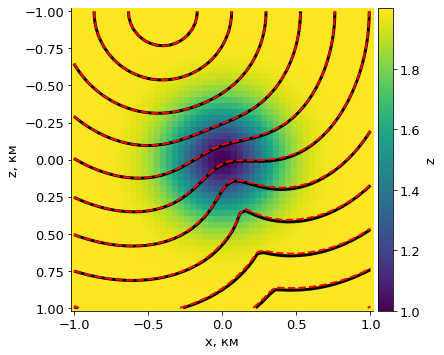

In [9]:
i, j = 3, 0

vmap = hv.Image((x, z, V.T), label='Velocity').opts(cmap='viridis', colorbar=True)

levels = np.linspace(0, T[i, j].max(), 12)

tmap = hv.Image((x, z, T[i, j].T), label='FMM')
tctr = hv.operation.contours(tmap, levels=levels).opts(cmap='kb', show_legend=True, linewidth=3, color_levels=1)

tnnmap = hv.Image((x, z, T_pred[i, j].T), label='NES')
tnnctr = hv.operation.contours(tnnmap, levels=levels).opts(cmap='autumn', show_legend=True, 
                                                           linestyle='dashed', linewidth=2, color_levels=1)

(vmap * tctr * tnnctr).opts(hv.opts.Image(fig_size=150, 
                                          show_legend=False, 
                                          invert_yaxis=True)).opts(show_legend=False, xlabel='x, км', ylabel='z, км', 
                                                                   fontsize=dict(labels=13, ticks=13))

## Lalplacian calculation

In [52]:
H = EikTP.HessianS(X, batch_size=100000, verbose=1).reshape(X.shape[:-1] + (-1,))

4/4 [==============================] - 19s 3s/step


:Overlay
   .Image.Hessian :Image   [x,y]   (z)
   .Contours.FMM  :Contours   [x,y]   (z)
   .Contours.NES  :Contours   [x,y]   (z)
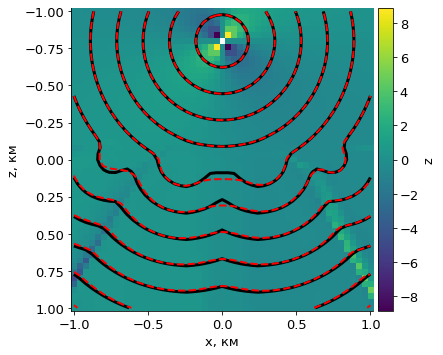

In [53]:
i, j = 5, 1

vmap = hv.Image((x, z, H[i, j, ..., 1].T), label='Hessian').opts(cmap='viridis', colorbar=True)

levels = np.linspace(0, T[i, j].max(), 12)

tmap = hv.Image((x, z, T[i, j].T), label='FMM')
tctr = hv.operation.contours(tmap, levels=levels).opts(cmap='kb', show_legend=True, linewidth=3, color_levels=1)

tnnmap = hv.Image((x, z, T_pred[i,j].T), label='NES')
tnnctr = hv.operation.contours(tnnmap, levels=levels).opts(cmap='autumn', show_legend=True, 
                                                           linestyle='dashed', linewidth=2, color_levels=1)

(vmap * tctr * tnnctr).opts(hv.opts.Image(fig_size=150, 
                                          show_legend=False, 
                                          invert_yaxis=True)).opts(show_legend=False, xlabel='x, км', ylabel='z, км', 
                                                                   fontsize=dict(labels=13, ticks=13))

## Raylet stationarity

In [11]:
Xr.shape

(51, 51, 2)

In [12]:
%%time
xs1 = [0.0, -0.9]; xs2 = [0.0, 0.9]
Sc, Tc = EikTP.Raylets(xs1=xs1, xs2=xs2, Xc=Xr,
                       traveltimes=True,
                       batch_size=100000)

Wall time: 507 ms


:Overlay
   .Image.Raylets :Image   [x,y]   (z)
   .Scatter.I     :Scatter   [x]   (y)
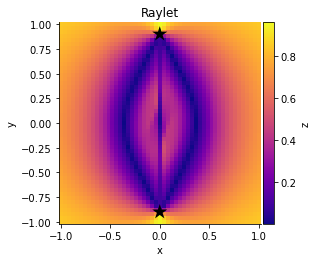

In [15]:
smap = hv.Image((x, z, Sc.T), label='Raylets').opts(cmap='plasma', colorbar=True)
# sctr = hv.operation.contours(smap, levels=[np.nanmin(Sc)]).opts(cmap='kb', show_legend=False, 
#                                                   linewidth=3, color_levels=1)
fig = smap * hv.Scatter(np.array([xs1, xs2])).opts(marker='*', s=250, c='k')
fig.opts(title='Raylet')

In [10]:
hv.save(fig, 'Raylet.png', dpi=300)